In [20]:
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import math

All file names and file path need to be edited to run the code

# Cotranscription - 2 NS System

In [ ]:
# REPLACE FILEPATH WITH THE ONE TO THE FOLDER forSizeAnalysis
os.chdir('')

In [ ]:
## Loading NPY files into arrays
## THESE CHORD LENGTHS ARE IN PX - YOU SHOULD CONVERT THEM TO MICRON -- easy way: simply change the multiplier from 1 to calibration
calibration = 0.07
# Repeat 1
ns2_1_1h = calibration*np.load('2NS_cotrans_60min_1.npy', allow_pickle = True)
ns2_1_2h = calibration*np.load('2NS_cotrans_120min_1.npy', allow_pickle = True)

# Repeat 2
ns2_2_1h = calibration*np.load('2NS_cotrans_60min_2.npy', allow_pickle = True)
ns2_2_2h = calibration*np.load('2NS_cotrans_120min_2.npy', allow_pickle = True)

# Repeat 3
ns2_3_1h = calibration*np.load('2NS_cotrans_60min_3.npy', allow_pickle = True)
ns2_3_2h = calibration*np.load('2NS_cotrans_120min_3.npy', allow_pickle = True)

In [ ]:
## Concatenating all repeats into single arrays
time1h = np.concatenate((ns2_1_1h, ns2_2_1h, ns2_3_1h), axis = 0)
time2h = np.concatenate((ns2_1_2h, ns2_2_2h, ns2_3_2h), axis = 0)

# Concatenating into single array for violinplot
chords = np.concatenate((time1h, time2h), axis = 0)

# Producing x array - all 1h get a corresponding '1h' label, the ones for 2h get a '2h' category label
categories = []
for i in range(len(ns2_1_1h) + len(ns2_2_1h) + len(ns2_3_1h)):
    categories.append('1h')

for i in range(len(ns2_1_2h) + len(ns2_2_2h) + len(ns2_3_2h)):
    categories.append('2h')

# building pandas dataframe for violinplot
df = pd.DataFrame({'Categories': np.array(categories),
             'Chords' : np.log10(chords) # using log10 of chords
             })

## colouring 1h points in red, 2h points in black -- replace with colours of your liking!
my_pal = {category: "r" if category == '1h' else "k" for category in df["Categories"].unique()}

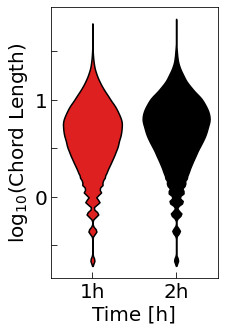

In [ ]:
# Plotting violinplot
plt.figure(figsize = (3, 5))
ax = sns.violinplot( x = 'Categories', y = 'Chords', data = df, inner = None, scale = 'area', palette = my_pal)
plt.ylabel(r'log$_{10}$(Chord Length)', fontsize = 20)
plt.xlabel('Time [h]', fontsize = 20)
ax = plt.gca()
ax.set_xticklabels(['1h', '2h'], fontsize = 20)
# ax.set_yticks([0, 0.5, 1, 1.5, 2, 2.5], fontsize = 20)
ax.set_yticklabels([-1, '', 0, '', 1, ''], fontsize = 20)
ax.tick_params(direction = 'in', length = 6);

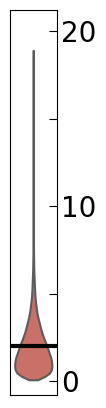

In [ ]:
ns2_2h = np.concatenate((ns2_1_2h, ns2_2_2h, ns2_3_2h), axis = 0)

categories_ns2_2h = []
for i in range(len(ns2_2h)):
  categories_ns2_2h.append('B_TX_2h')

df_TXB2h = pd.DataFrame({'Categories': np.array(categories_ns2_2h),
             'Chords' : ns2_2h,
             })

plt.figure(figsize = (0.6, 5))
ax = sns.violinplot( x = 'Categories', y = 'Chords', data = df_TXB2h, inner = None, scale = 'area', color = '#D96459', cut = 0)
ax.axhline(np.mean(df_TXB2h['Chords']), lw = 3, color = 'k')
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([0, 5, 10, 15, 20])
ax.set_yticklabels([0, '', 10, '', 20], fontsize = 20)
ax.tick_params(direction = 'in', length = 6);
ax.yaxis.tick_right()
plt.ylim([-0.8,21.2])
plt.savefig("B_TX_3h" + ".svg", format = 'svg', dpi=300)

In [ ]:
# Calculating mean of CLD for each repeat at 1h separately
ns2_mean_1_1h = np.mean(ns2_1_1h)
ns2_mean_2_1h = np.mean(ns2_2_1h)
ns2_mean_3_1h = np.mean(ns2_3_1h)
# Calculating mean of the three means at 1h
ns2_mean_1h = np.mean([ns2_mean_1_1h, ns2_mean_2_1h, ns2_mean_3_1h])

ns2_std_1_1h = np.std(ns2_1_1h)
ns2_std_2_1h = np.std(ns2_2_1h)
ns2_std_3_1h = np.std(ns2_3_1h)

# Calculating mean of CLD for each repeat at 2h separately
ns2_mean_1_2h = np.mean(ns2_1_2h)
ns2_mean_2_2h = np.mean(ns2_2_2h)
ns2_mean_3_2h = np.mean(ns2_3_2h)
# Calculating mean of the three means at 2h
ns2_mean_2h = np.mean([ns2_mean_1_2h, ns2_mean_2_2h, ns2_mean_3_2h])

ns2_std_1_2h = np.std(ns2_1_2h)
ns2_std_2_2h = np.std(ns2_2_2h)
ns2_std_3_2h = np.std(ns2_3_2h)

In [ ]:
# Stderr on mean is the stddev of the distribution of the means (approximated here with the 3 mean values available
# at both time points)
ns2_std_1h = np.std([ns2_mean_1_1h, ns2_mean_2_1h, ns2_mean_3_1h], ddof = 1)
ns2_std_2h = np.std([ns2_mean_1_2h, ns2_mean_2_2h, ns2_mean_3_2h], ddof = 1)

print("stddev of mean for 1h is:", round(ns2_std_1h,2))
print("stddev of mean for 2h is:", round(ns2_std_2h,2))

stddev of mean for 1h is: 0.6
stddev of mean for 2h is: 0.14


In [ ]:
# So here is the way to calculate the estimator:
ns2_sem_1h = math.sqrt((ns2_std_1_1h ** 2 + ns2_std_2_1h ** 2 + ns2_std_3_1h ** 2)/3)
ns2_sem_2h = math.sqrt((ns2_std_1_2h ** 2 + ns2_std_2_2h ** 2 + ns2_std_3_2h ** 2)/3)

print("estimator of stderr for mean for 1h is:", round(ns2_sem_1h,2))
print("estimator of stderr for mean for 2h is:", round(ns2_sem_2h,2))

stderr for mean for 1h is: 0.91
stderr for mean for 2h is: 1.43


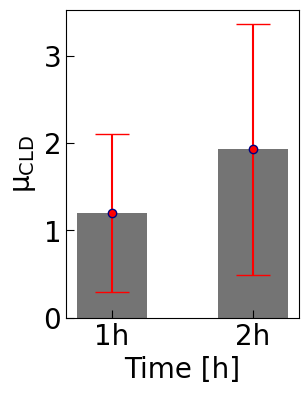

In [ ]:
# Plotting bar chart with errorbars
# You can change the colours to your liking :)
# ALSO: NEED TO CHANGE YTICKS AFTER INTRODUCING THE CALIBRATION TO MICRONS!
plt.figure(figsize = (3, 4))
plt.bar([1, 2], [ns2_mean_1h, ns2_mean_2h], width = 0.5, color = '#747474')
plt.errorbar([1, 2], [ns2_mean_1h, ns2_mean_2h], yerr= [ns2_sem_1h, ns2_sem_2h], ls = '', marker = 'o', mec = 'navy', mfc = 'red', color = 'red', capsize = 12)
plt.xticks([1, 2], ['1h', '2h'], fontsize = 20)
plt.xlabel('Time [h]', fontsize = 20)
plt.yticks([0, 1, 2, 3], [0, 1, 2, 3], fontsize = 20)
plt.ylabel(r'$\mu_{CLD}$', fontsize = 20)
ax = plt.gca()
ax.tick_params(direction = 'in', length = 6)

plt.savefig("2NS system.svg", format = 'svg', dpi=300)

# Cotrnascription - 1NS System

In [ ]:
## Loading NPY files into arrays
# AGAIN: CHANGE CALIBRATION FACTOR TO MICRON!
calibration = 0.07
# repeat 1
ns1_1_1h = calibration*np.load('Single_cotrans_60min_1.npy', allow_pickle = True)
ns1_1_2h = calibration*np.load('Single_cotrans_120min_1.npy', allow_pickle = True)
ns1_1_3h = calibration*np.load('Single_cotrans_180min_1.npy', allow_pickle = True)

# repeat 2
ns1_2_1h = calibration*np.load('Single_cotrans_60min_2.npy', allow_pickle = True)
ns1_2_2h = calibration*np.load('Single_cotrans_120min_2.npy', allow_pickle = True)
ns1_2_3h = calibration*np.load('Single_cotrans_180min_2.npy', allow_pickle = True)

# repeat 3
ns1_3_1h = calibration*np.load('Single_cotrans_60min_3.npy', allow_pickle = True)
ns1_3_2h = calibration*np.load('Single_cotrans_120min_3.npy', allow_pickle = True)
ns1_3_3h = calibration*np.load('Single_cotrans_180min_3.npy', allow_pickle = True)

In [ ]:
ns1_mean_1_1h = np.mean(ns1_1_1h)
ns1_mean_2_1h = np.mean(ns1_2_1h)
ns1_mean_3_1h = np.mean(ns1_3_1h)
ns1_mean_1h = np.mean([ns1_mean_1_1h, ns1_mean_2_1h, ns1_mean_3_1h])

ns1_std_1_1h = np.std(ns1_1_1h)
ns1_std_2_1h = np.std(ns1_2_1h)
ns1_std_3_1h = np.std(ns1_3_1h)

ns1_mean_1_2h = np.mean(ns1_1_2h)
ns1_mean_2_2h = np.mean(ns1_2_2h)
ns1_mean_3_2h = np.mean(ns1_3_2h)
ns1_mean_2h = np.mean([ns1_mean_1_2h, ns1_mean_2_2h, ns1_mean_3_2h])

ns1_std_1_2h = np.std(ns1_1_2h)
ns1_std_2_2h = np.std(ns1_2_2h)
ns1_std_3_2h = np.std(ns1_3_2h)

ns1_mean_1_3h = np.mean(ns1_1_3h)
ns1_mean_2_3h = np.mean(ns1_2_3h)
ns1_mean_3_3h = np.mean(ns1_3_3h)
ns1_mean_3h = np.mean([ns1_mean_1_3h, ns1_mean_2_3h, ns1_mean_3_3h])

ns1_std_1_3h = np.std(ns1_1_3h)
ns1_std_2_3h = np.std(ns1_2_3h)
ns1_std_3_3h = np.std(ns1_3_3h)

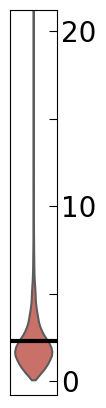

In [ ]:
ns1_3h = np.concatenate((ns1_1_3h, ns1_2_3h, ns1_3_3h), axis = 0)

categories_ns1_3h = []
for i in range(len(ns1_3h)):
  categories_ns1_3h.append('J3_TX_3h')

df_TX3h = pd.DataFrame({'Categories': np.array(categories_ns1_3h),
             'Chords' : ns1_3h,
             })

plt.figure(figsize = (0.6, 5))
ax = sns.violinplot( x = 'Categories', y = 'Chords', data = df_TX3h, inner = None, scale = 'area', color = '#D96459', cut = 0)
ax.axhline(np.mean(df_TX3h['Chords']), lw = 3, color = 'k')
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([0, 5, 10, 15, 20])
ax.set_yticklabels([0, '', 10, '', 20], fontsize = 20)
ax.tick_params(direction = 'in', length = 6);
ax.yaxis.tick_right()
plt.ylim([-0.8,21.2])
plt.savefig("J3_TX_3h" + ".svg", format = 'svg', dpi=300)

In [ ]:
std_1h = np.std([ns1_mean_1_1h, ns1_mean_2_1h, ns1_mean_3_1h], ddof = 1)
std_2h = np.std([ns1_mean_1_2h, ns1_mean_2_2h, ns1_mean_3_2h], ddof = 1)
std_3h = np.std([ns1_mean_1_3h, ns1_mean_2_3h, ns1_mean_3_3h], ddof = 1)

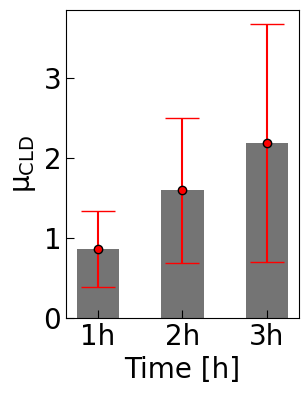

In [ ]:
plt.figure(figsize = (3, 4))
plt.bar([1, 2, 3], [ns1_mean_1h, ns1_mean_2h, ns1_mean_3h], width = 0.5,color = '#747474')
plt.errorbar([1, 2, 3], [ns1_mean_1h, ns1_mean_2h, ns1_mean_3h], yerr= [ns1_sem_1h, ns1_sem_2h, ns1_sem_3h], ls = '', marker = 'o', mec = 'k', mfc = 'red', color = 'red', capsize = 12)
plt.xticks([1, 2, 3], ['1h', '2h', '3h'], fontsize = 20)
plt.xlabel('Time [h]', fontsize = 20)
plt.yticks([0, 1, 2, 3], [0, 1, 2, 3], fontsize = 20)
plt.ylabel(r'$\mu_{CLD}$', fontsize = 20)
ax = plt.gca()
ax.tick_params(direction = 'in', length = 6)

plt.savefig("single cotranscription system.svg", format = 'svg', dpi=300)

In [ ]:
# Copy-pasted number values from TXT file in the same folder
num_1h = np.array([638, 668, 626])
num_2h = np.array([989, 473, 851])
num_3h = np.array([449, 526, 921])

mean_num_1h = np.mean(num_1h)
mean_num_2h = np.mean(num_2h)
mean_num_3h = np.mean(num_3h)

# Here you can calculate the standard deviation among the numbers you observed - not sure how you want to handle this!
std_num_1h = np.std(num_1h, ddof = 1)
std_num_2h = np.std(num_2h, ddof = 1)
std_num_3h = np.std(num_3h, ddof = 1)

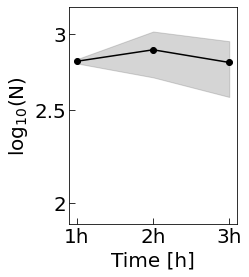

In [ ]:
plt.figure(figsize = (3,4))
# plt.errorbar([1, 2, 3], np.array([mean_num_1h, mean_num_2h, mean_num_3h]), np.array([std_num_1h, std_num_2h, std_num_3h]), marker = 'o', mec = 'k', mfc = '#747474', capsize = 12, markersize = 10)
plt.plot([1,2,3], np.log10(np.array([mean_num_1h, mean_num_2h, mean_num_3h])), 'o', color = 'k')
plt.plot([1,2,3], np.log10(np.array([mean_num_1h, mean_num_2h, mean_num_3h])), color = 'k')
plt.fill_between([1,2,3],np.log10(np.array([mean_num_1h - std_num_1h, mean_num_2h - std_num_2h, mean_num_3h - std_num_3h])), np.log10(np.array([mean_num_1h + std_num_1h, mean_num_2h + std_num_2h, mean_num_3h + std_num_3h])), color = '#747474', alpha = 0.3)
plt.yscale('log')
plt.xlabel('Time [h]', fontsize = 20)
plt.xticks([1, 2, 3], [1,2,3], fontsize = 20)
plt.ylabel(r'log$_{10}$(N)', fontsize = 20)
plt.yticks([2, 2.5, 3], [2, 2.5, 3], fontsize = 20)
ax = plt.gca()
ax.tick_params(direction = 'in', length = 3, which = 'minor')
ax.tick_params(direction = 'in', length = 6, which = 'major')
plt.xticks([1, 2,3], ['1h', '2h', '3h'], fontsize = 20)
plt.ylim([1.9, 3.2])
plt.savefig("single cotrans number.svg", format = 'svg', dpi=300)

plt.show()

# KL sequences - stem 2 variants

In [ ]:
## Loading NPY files into arrays
## THESE CHORD LENGTHS ARE IN PX - YOU SHOULD CONVERT THEM TO MICRON -- easy way: simply change the multiplier from 1 to calibration
calibration = 0.07

S1_1 = calibration*np.load('Sato_WT_1.npy', allow_pickle = True)
S1_2 = calibration*np.load('Sato_WT_2.npy', allow_pickle = True)
S1_3 = calibration*np.load('Sato_WT_3.npy', allow_pickle = True)

S2_1 = calibration*np.load('Sato_v2_1.npy', allow_pickle = True)
S2_2 = calibration*np.load('Sato_v2_2.npy', allow_pickle = True)
S2_3 = calibration*np.load('Sato_v2_3.npy', allow_pickle = True)

S4_1 = calibration*np.load('Sato_v4_1.npy', allow_pickle = True)
S4_2 = calibration*np.load('Sato_v4_2.npy', allow_pickle = True)
S4_3 = calibration*np.load('Sato_v4_3.npy', allow_pickle = True)

S5_1 = calibration*np.load('Sato_v5_1.npy', allow_pickle = True)
S5_2 = calibration*np.load('Sato_v5_2.npy', allow_pickle = True)

S6_1 = calibration*np.load('Sato_v6_1.npy', allow_pickle = True)
S6_2 = calibration*np.load('Sato_v6_2.npy', allow_pickle = True)
S6_3 = calibration*np.load('Sato_v6_3.npy', allow_pickle = True)

In [ ]:
## Concatenating all repeats into single arrays
Sato_1 = np.concatenate((S1_1, S1_2, S1_3), axis = 0)
Sato_2 = np.concatenate((S2_1, S2_2, S2_3), axis = 0)
Sato_3 = [-1]
Sato_4 = np.concatenate((S4_1, S4_2, S4_3), axis = 0)
Sato_5 = np.concatenate((S5_1, S5_2), axis = 0)
Sato_6 = np.concatenate((S6_1, S6_2, S6_3), axis = 0)

In [ ]:
## plot pooled violin plots
pool_categories = []
for i in range(len(Sato_1)):
  pool_categories.append('Sato_WT')
for  i in range(len(Sato_2)):
  pool_categories.append('Sato_v2')
for i in range(len(Sato_3)):
  pool_categories.append('Sato_3')
for  i in range(len(Sato_4)):
  pool_categories.append('Sato_v4')
for i in range(len(Sato_5)):
  pool_categories.append('Sato_5')
for  i in range(len(Sato_6)):
  pool_categories.append('Sato_6')

pool_chords = np.concatenate((Sato_1, Sato_2, Sato_3, Sato_4, Sato_5, Sato_6), axis = 0)

# building pandas dataframe for violinplot
pool_df = pd.DataFrame({'Categories': np.array(pool_categories),
             'Chords' : pool_chords # using log10 of chords
             })

In [ ]:
plt.figure(figsize = (7, 4))
ax = sns.violinplot( x = 'Categories', y = 'Chords', data = pool_df, inner = None, scale = 'area', color = '#D96459', cut = 0)
#ax.axhline(np.mean(), lw = 3, color = 'k')
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.set_yticks([0, 2.5, 5, 7.5, 10])
ax.set_xticklabels(["5'-GCGCGC", "5'-GUGCGC", "5'-GCGCGU", "5'-GAGCGC", "5'-GCGCUC", "5'-GCUCGC"], fontsize = 20, rotation = 60)
ax.set_yticklabels([0, '', 5, '', 10], fontsize = 20)
ax.tick_params(direction = 'in', length = 6);
plt.ylim([-0.8,12.2])
# plt.tight_layout()

plt.savefig("Sato_pool_2" + ".svg", format = 'svg', dpi=300)

In [ ]:
## Plot seperate violin plots
# Build a dataframe for each sample
Sato1_categories = []
for i in range(len(S1_1) + len(S1_2) + len(S1_3)):
    Sato1_categories.append('Sato_WT')
# building pandas dataframe for violinplot
Sato1_df = pd.DataFrame({'Categories': np.array(Sato1_categories),
             'Chords' : Sato_1
             })

Sato2_categories = []
for i in range(len(S2_1) + len(S2_2) + len(S2_3)):
    Sato2_categories.append('Sato_v2')
# building pandas dataframe for violinplot
Sato2_df = pd.DataFrame({'Categories': np.array(Sato2_categories),
             'Chords' : Sato_2
             })

Sato4_categories = []
for i in range(len(S4_1) + len(S4_2) + len(S4_3)):
    Sato4_categories.append('Sato_v4')
# building pandas dataframe for violinplot
Sato4_df = pd.DataFrame({'Categories': np.array(Sato4_categories),
             'Chords' : Sato_4
             })

Sato5_categories = []
for i in range(len(S5_1) + len(S5_2)):
    Sato5_categories.append('Sato_v5')
# building pandas dataframe for violinplot
Sato5_df = pd.DataFrame({'Categories': np.array(Sato5_categories),
             'Chords' : Sato_5
             })

Sato6_categories = []
for i in range(len(S6_1) + len(S6_2) + len(S6_3)):
    Sato6_categories.append('Sato_v6')
# building pandas dataframe for violinplot
Sato6_df = pd.DataFrame({'Categories': np.array(Sato6_categories),
             'Chords' : Sato_6
             })

In [ ]:
name = ['Sato_WT', 'Sato_v2', 'Sato_v4', 'Sato_v5', 'Sato_v6']
data = [Sato1_df, Sato2_df, Sato4_df, Sato5_df, Sato6_df]

for (name, df) in zip(name, data):
  plt.figure(figsize = (0.6, 5))
  ax = sns.violinplot( x = 'Categories', y = 'Chords', data = df, inner = None, scale = 'area', color = '#D96459', cut = 0)
  ax.axhline(np.mean(df['Chords']), lw = 3, color = 'k')
  plt.xlabel('')
  plt.ylabel('')
  ax = plt.gca()
  ax.set_xticks([])
  ax.set_yticks([0, 2.5, 5,7.5, 10])
  ax.set_yticklabels([0, '', 5, '', 10], fontsize = 20)
  ax.tick_params(direction = 'in', length = 6);
  ax.yaxis.tick_right()
  plt.ylim([-0.5,12])

  # plt.savefig(name + ".svg", format = 'svg', dpi=300)

In [ ]:
plt.figure(figsize = (0.6, 5))
ax = sns.violinplot( x = 'Categories', y = 'Chords', data = Sato1_df, inner = None, scale = 'area', color = '#D96459', cut = 0)
ax.axhline(np.mean(Sato1_df['Chords']), lw = 3, color = 'k')
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([0, 5, 10, 15, 20])
ax.set_yticklabels([0, '', 10, '', 20], fontsize = 20)
ax.tick_params(direction = 'in', length = 6);
ax.yaxis.tick_right()
plt.ylim([-0.5,21])

plt.savefig(name + "_v2.svg", format = 'svg', dpi=300)

In [ ]:
S1_40_1 = calibration*np.load('S1_40C_s1.npy', allow_pickle = True)
S1_40_2 = calibration*np.load('S1_40C_s2.npy', allow_pickle = True)
S1_40_3 = calibration*np.load('S1_40C_s3.npy', allow_pickle = True)

S1_50_1 = calibration*np.load('S1_50C_s1.npy', allow_pickle = True)
S1_50_2 = calibration*np.load('S1_50C_s2.npy', allow_pickle = True)
S1_50_3 = calibration*np.load('S1_50C_s3.npy', allow_pickle = True)

S1_70_1 = calibration*np.load('S1_70_s1.npy', allow_pickle = True)
S1_70_2 = calibration*np.load('S1_70_s2.npy', allow_pickle = True)

In [ ]:
S1_40 = np.concatenate((S1_40_1, S1_40_2, S1_40_3), axis = 0)
S1_50 = np.concatenate((S1_50_1, S1_50_2, S1_50_3), axis = 0)
S1_70 = np.concatenate((S1_70_1, S1_70_2), axis = 0)

In [ ]:
pool_categories_Sato_temperature = []
for i in range(len(S1_40)):
  pool_categories_Sato_temperature.append('40C')
for  i in range(len(Sato_1)):
  pool_categories_Sato_temperature.append('50C')
# for i in range(len(S1_50)):
#   pool_categories_Sato_temperature.append('50C')
for  i in range(len(S1_70)):
  pool_categories_Sato_temperature.append('70C')

pool_chords_Sato_temperature = np.concatenate((S1_40, Sato_1, S1_70), axis = 0)

# building pandas dataframe for violinplot
pool_df_Sato_temperature = pd.DataFrame({'Categories': np.array(pool_categories_Sato_temperature),
             'Chords' : pool_chords_Sato_temperature,
             })

3.335228219104638
2.7305262382075473
5.74653395120106
5.217789172831204


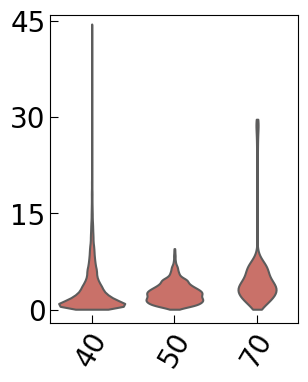

In [ ]:
plt.figure(figsize = (3.2, 4))
ax = sns.violinplot( x = 'Categories', y = 'Chords', data = pool_df_Sato_temperature, inner = None, scale = 'area', color = '#D96459', cut = 0)
# ax.axhline(np.mean(), lw = 3, color = 'k')
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.set_yticks([0, 15, 30, 45])
ax.set_xticklabels(["40", "50", "70"], fontsize = 20, rotation = 60)
ax.set_yticklabels([0, 15, 30, 45], fontsize = 20)
ax.tick_params(direction = 'in', length = 6);
plt.ylim([-2,46])
# ax.legend(["50 °C"])
plt.savefig("Sato_temperature" + ".svg", format = 'svg', dpi=300)

print(np.mean(S1_40))
print(np.mean(Sato_1))
print(np.mean(S1_50))
print(np.mean(S1_70))

# KL sequence - stem 1 sequence

In [ ]:
## Loading NPY files into arrays

calibration = 0.07

# 50C
J1_1 = calibration*np.load('Jaimie_WT_1.npy', allow_pickle = True)
J1_2 = calibration*np.load('Jaimie_WT_2.npy', allow_pickle = True)
J1_3 = calibration*np.load('Jaimie_WT_3.npy', allow_pickle = True)

J2_1 = calibration*np.load('Jaimie_v2_1.npy', allow_pickle = True)
J2_2 = calibration*np.load('Jaimie_v2_2.npy', allow_pickle = True)
J2_3 = calibration*np.load('Jaimie_v2_3.npy', allow_pickle = True)

J4_1 = calibration*np.load('Jaimie_v4_1.npy', allow_pickle = True)
J4_2 = calibration*np.load('Jaimie_v4_2.npy', allow_pickle = True)
J4_3 = calibration*np.load('Jaimie_v4_3.npy', allow_pickle = True)

# 40C
# J1_40_1 = calibration*np.load('Jaimie_WT_40_1.npy', allow_pickle = True)
J1_40_2 = calibration*np.load('Jaimie_WT_40_2.npy', allow_pickle = True)
J1_40_3 = calibration*np.load('Jaimie_WT_40_3.npy', allow_pickle = True)

J2_40_2 = calibration*np.load('Jaimie_v2_40_2.npy', allow_pickle = True)
J2_40_3 = calibration*np.load('Jaimie_v2_40_3.npy', allow_pickle = True)

J3_40_1 = calibration*np.load('Jaimie_v3_40_1.npy', allow_pickle = True)
J3_40_2 = calibration*np.load('Jaimie_v3_40_2.npy', allow_pickle = True)
J3_40_3 = calibration*np.load('Jaimie_v3_40_3.npy', allow_pickle = True)

J4_40_1 = calibration*np.load('Jaimie_v4_40_1.npy', allow_pickle = True)
J4_40_2 = calibration*np.load('Jaimie_v4_40_2.npy', allow_pickle = True)
J4_40_3 = calibration*np.load('Jaimie_v4_40_3.npy', allow_pickle = True)

J6_40_1 = calibration*np.load('Jaimie_v6_40_1.npy', allow_pickle = True)
J6_40_2 = calibration*np.load('Jaimie_v6_40_2.npy', allow_pickle = True)
J6_40_3 = calibration*np.load('Jaimie_v6_40_3.npy', allow_pickle = True)

In [ ]:
# 50C
Jaimie_1 = np.concatenate((J1_1, J1_2, J1_3), axis = 0)
Jaimie_2 = np.concatenate((J2_1, J2_2, J2_3), axis = 0)
Jaimie_3 = [-1]
Jaimie_4 = np.concatenate((J4_1, J4_2, J4_3), axis = 0)
Jaimie_5 = [-1]
Jaimie_6 = [-1]

# 40C
# Jaimie_40_1 = np.concatenate((J1_40_1, J1_40_2, J1_40_3), axis = 0)
Jaimie_40_1 = np.concatenate((J1_40_2, J1_40_3), axis = 0)
Jaimie_40_2 = np.concatenate((J2_40_2, J2_40_3), axis = 0)
Jaimie_40_3 = np.concatenate((J3_40_1, J3_40_2, J3_40_3), axis = 0)
Jaimie_40_4 = np.concatenate((J4_40_1, J4_40_2, J4_40_3), axis = 0)
Jaimie_40_5 = [-1]
Jaimie_40_6 = np.concatenate((J6_40_1, J6_40_2, J6_40_3), axis = 0)

In [ ]:
pool_categories_50C = []
for i in range(len(Jaimie_1)):
  pool_categories_50C.append('Jaimie_WT')
for  i in range(len(Jaimie_2)):
  pool_categories_50C.append('Jaimie_v2')
pool_categories_50C.append('Jaimie_v3')
for  i in range(len(Jaimie_4)):
  pool_categories_50C.append('Jaimie_v4')
pool_categories_50C.append('Jaimie_v5')
pool_categories_50C.append('Jaimie_v6')

pool_categories_40C = []
for i in range(len(Jaimie_40_1)):
  pool_categories_40C.append('Jaimie_40_WT')
for  i in range(len(Jaimie_40_2)):
  pool_categories_40C.append('Jaimie_40_v2')
for  i in range(len(Jaimie_40_3)):
  pool_categories_40C.append('Jaimie_40_v3')
for  i in range(len(Jaimie_40_4)):
  pool_categories_40C.append('Jaimie_40_v4')
pool_categories_40C.append('Jaimie_40_v5')
for  i in range(len(Jaimie_40_6)):
  pool_categories_40C.append('Jaimie_40_v6')

pool_chords_50C = np.concatenate((Jaimie_1, Jaimie_2, Jaimie_3, Jaimie_4, Jaimie_5, Jaimie_6), axis = 0)
pool_chords_40C= np.concatenate((Jaimie_40_1, Jaimie_40_2, Jaimie_40_3, Jaimie_40_4, Jaimie_40_5, Jaimie_40_6), axis = 0)

# building pandas dataframe for violinplot
pool_df_50C = pd.DataFrame({'Categories': np.array(pool_categories_50C),
             'Chords_50C' : pool_chords_50C,
             })

pool_df_40C = pd.DataFrame({'Categories': np.array(pool_categories_40C),
             'Chords_40C' : pool_chords_40C,
             })

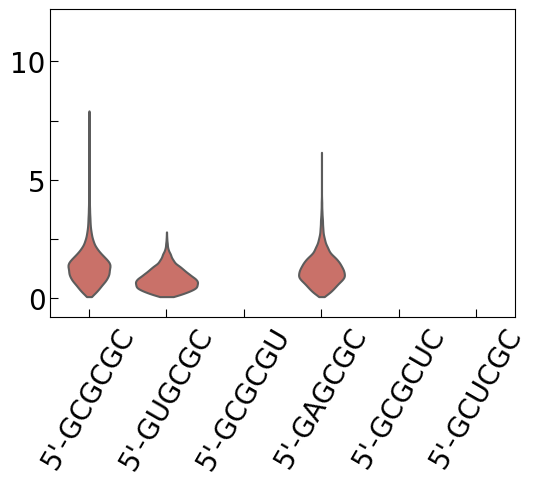

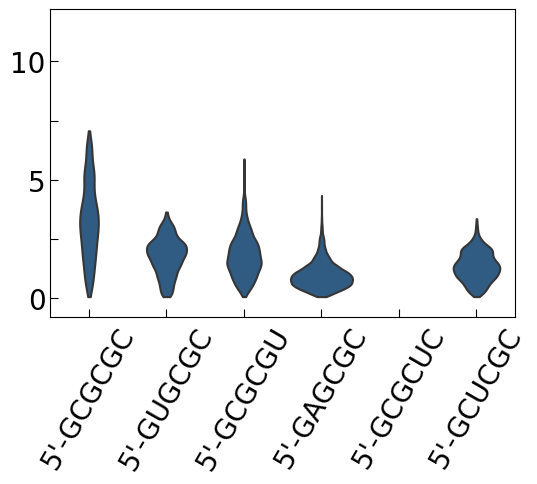

In [ ]:
plt.figure(figsize = (6, 4))
ax = sns.violinplot( x = 'Categories', y = 'Chords_50C', data = pool_df_50C, inner = None, scale = 'area', color = '#D96459', cut = 0)
# ax.axhline(np.mean(), lw = 3, color = 'k')
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.set_yticks([0, 2.5, 5, 7.5, 10])
ax.set_xticklabels(["5'-GCGCGC", "5'-GUGCGC", "5'-GCGCGU", "5'-GAGCGC", "5'-GCGCUC", "5'-GCUCGC"], fontsize = 20, rotation = 60)
ax.set_yticklabels([0, '', 5, '', 10], fontsize = 20)
ax.tick_params(direction = 'in', length = 6);
plt.ylim([-0.8,12.2])
# plt.tight_layout()
# ax.legend(["50 °C"])
plt.savefig("Jaimie_pool_50C" + ".svg", format = 'svg', dpi=300)


plt.figure(figsize = (6, 4))
ax = sns.violinplot( x = 'Categories', y = 'Chords_40C', data = pool_df_40C, inner = None, scale = 'area', color = '#225B91', cut = 0)
# ax.axhline(np.mean(), lw = 3, color = 'k')
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.set_yticks([0, 2.5, 5, 7.5, 10])
ax.set_xticklabels(["5'-GCGCGC", "5'-GUGCGC", "5'-GCGCGU", "5'-GAGCGC", "5'-GCGCUC", "5'-GCUCGC"], fontsize = 20, rotation = 60)
ax.set_yticklabels([0, '', 5, '', 10], fontsize = 20)
ax.tick_params(direction = 'in', length = 6);
plt.ylim([-0.8,12.2])
# plt.tight_layout()
# ax.legend(["40 °C"])
plt.savefig("Jaimie_pool_40C" + ".svg", format = 'svg', dpi=300)

In [ ]:
J1_categories = []
for i in range(len(J1_1) + len(J1_2) + len(J1_3)):
    J1_categories.append('J1')
# building pandas dataframe for violinplot
J1_df = pd.DataFrame({'Categories': np.array(J1_categories),
             'Chords' : Jaimie_1
             })

J2_categories = []
for i in range(len(J2_1) + len(J2_2) + len(J2_3)):
    J2_categories.append('J2')
# building pandas dataframe for violinplot
J2_df = pd.DataFrame({'Categories': np.array(J2_categories),
             'Chords' : Jaimie_2
             })

J4_categories = []
for i in range(len(J4_1) + len(J4_2) + len(J4_3)):
    J4_categories.append('J4')
# building pandas dataframe for violinplot
J4_df = pd.DataFrame({'Categories': np.array(J4_categories),
             'Chords' : Jaimie_4
             })

name = ['J1', 'J2', 'J4']
data = [J1_df, J2_df, J4_df]

for (name, df) in zip(name, data):
  plt.figure(figsize = (0.6, 5))
  ax = sns.violinplot( x = 'Categories', y = 'Chords', data = df, inner = None, scale = 'area', color = '#D96459', cut = 0)
  ax.axhline(np.mean(df['Chords']), lw = 3, color = 'k')
  plt.xlabel('')
  plt.ylabel('')
  ax = plt.gca()
  ax.set_xticks([])
  ax.set_yticks([0, 2.5, 5, 7.5, 10])
  ax.set_yticklabels([0, '', 5, '', 10], fontsize = 20)
  ax.tick_params(direction = 'in', length = 6);
  ax.yaxis.tick_right()
  plt.ylim([-0.5,12])
  plt.savefig(str(name) + ".svg", format = 'svg', dpi=300)

# Stem sequence - 20/25 nt

In [ ]:
## Loading NPY files into arrays

calibration = 0.07

Awt_1 = calibration*np.load('Awt_s1.npy', allow_pickle = True)
Awt_2 = calibration*np.load('Awt_s2.npy', allow_pickle = True)
Awt_3 = calibration*np.load('Awt_s3.npy', allow_pickle = True)

# Gwt_1 = calibration*np.load('Gwt_s1.npy', allow_pickle = True)
# Gwt_2 = calibration*np.load('Gwt_s2.npy', allow_pickle = True)
# Gwt_3 = calibration*np.load('Gwt_s3.npy', allow_pickle = True)

# concatenate different replicates
Awt = np.concatenate((Awt_1, Awt_2, Awt_3), axis = 0)
# Gwt = np.concatenate((Gwt_1, Gwt_2, Gwt_3), axis = 0)

In [ ]:
pool_categories_stems = []

for i in range(len(Jaimie_1)):
  pool_categories_stems.append('stem1')
for  i in range(len(Sato_1)):
  pool_categories_stems.append('stem2')
for  i in range(len(Awt)):
  pool_categories_stems.append('stem3')
# for  i in range(len(Gwt)):
#   pool_categories_stems.append('stem4')

pool_chords_stems = np.concatenate((Jaimie_1, Sato_1, Awt), axis = 0)

pool_df_stems = pd.DataFrame({'Categories': np.array(pool_categories_stems),
             'Chords' : pool_chords_stems,
             })

<ipython-input-12-144fffd6fac2>:2: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  ax = sns.violinplot( x = 'Categories', y = 'Chords', data = pool_df_stems, inner = None, scale = 'area', color = '#D96459', cut = 0)
<ipython-input-12-144fffd6fac2>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["stem1", "stem2", "stem3"], fontsize = 20, rotation = 60)


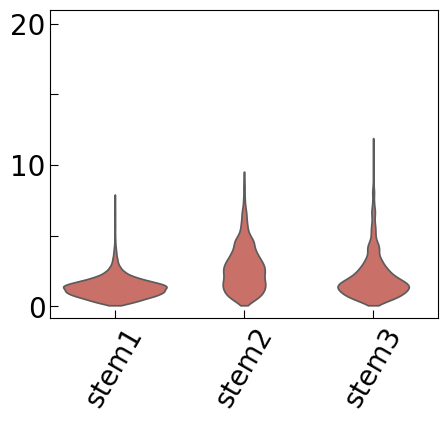

In [ ]:
plt.figure(figsize = (5, 4))
ax = sns.violinplot( x = 'Categories', y = 'Chords', data = pool_df_stems, inner = None, scale = 'area', color = '#D96459', cut = 0)
# ax.axhline(np.mean(), lw = 3, color = 'k')
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.set_yticks([0, 5, 10, 15, 20])
ax.set_xticklabels(["stem1", "stem2", "stem3"], fontsize = 20, rotation = 60)
ax.set_yticklabels([0, '', 10, '', 20], fontsize = 20)
ax.tick_params(direction = 'in', length = 6);
plt.ylim([-0.8,21])
# ax.legend(["50 °C"])
plt.savefig("Jaimie_pool_stems" + ".svg", format = 'svg', dpi=300)

## Plot separatly


<ipython-input-14-0d9d9a10a172>:10: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='area'` for the same effect.
  ax = sns.violinplot( x = 'Categories', y = 'Chords', data = Awt_df, inner = None, scale = 'area', color = '#D96459', cut = 0)


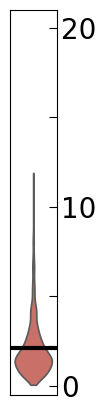

In [ ]:
Awt_categories = []
for i in range(len(Awt_1) + len(Awt_2) + len(Awt_3)):
    Awt_categories.append('Awt')
# building pandas dataframe for violinplot
Awt_df = pd.DataFrame({'Categories': np.array(Awt_categories),
             'Chords' : Awt
             })

plt.figure(figsize = (0.6, 5))
ax = sns.violinplot( x = 'Categories', y = 'Chords', data = Awt_df, inner = None, scale = 'area', color = '#D96459', cut = 0)
ax.axhline(np.mean(Awt_df['Chords']), lw = 3, color = 'k')
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([0, 5, 10, 15, 20])
ax.set_yticklabels([0, '', 10, '', 20], fontsize = 20)
ax.tick_params(direction = 'in', length = 6);
ax.yaxis.tick_right()
plt.ylim([-0.5,21])
plt.savefig("Awt.svg", format = 'svg', dpi=300)

# 2NS system: variants

In [ ]:
A_1 = calibration*np.load('2NS_A_1.npy', allow_pickle = True)
A_2 = calibration*np.load('2NS_A_2.npy', allow_pickle = True)
A_3 = calibration*np.load('2NS_A_3.npy', allow_pickle = True)

B_1 = calibration*np.load('2NS_B_1.npy', allow_pickle = True)
B_2 = calibration*np.load('2NS_B_2.npy', allow_pickle = True)
B_3 = calibration*np.load('2NS_B_3.npy', allow_pickle = True)

C_1 = calibration*np.load('2NS_C_1.npy', allow_pickle = True)
C_2 = calibration*np.load('2NS_C_2.npy', allow_pickle = True)
C_3 = calibration*np.load('2NS_C_3.npy', allow_pickle = True)

D_1 = calibration*np.load('2NS_D_1.npy', allow_pickle = True)
D_2 = calibration*np.load('2NS_D_2.npy', allow_pickle = True)
D_3 = calibration*np.load('2NS_D_3.npy', allow_pickle = True)

E_1 = calibration*np.load('2NS_E_1.npy', allow_pickle = True)
E_2 = calibration*np.load('2NS_E_2.npy', allow_pickle = True)

F_1 = calibration*np.load('2NS_F_1.npy', allow_pickle = True)
F_2 = calibration*np.load('2NS_F_2.npy', allow_pickle = True)

In [ ]:
## Concatenating all repeats into single arrays
A = np.concatenate((A_1, A_2, A_3), axis = 0)
B = np.concatenate((B_1, B_2, B_3), axis = 0)
C = np.concatenate((C_1, C_2, C_3), axis = 0)
D = np.concatenate((D_1, D_2, D_3), axis = 0)
E = np.concatenate((E_1, E_2), axis = 0)
F = np.concatenate((F_1, F_2), axis = 0)

# Build a dataframe for each sample
A_categories = []
for i in range(len(A_1) + len(A_2) + len(A_3)):
    A_categories.append('A')
# building pandas dataframe for violinplot
A_df = pd.DataFrame({'Categories': np.array(A_categories),
             'Chords' : A
             })

B_categories = []
for i in range(len(B_1) + len(B_2) + len(B_3)):
    B_categories.append('B')
# building pandas dataframe for violinplot
B_df = pd.DataFrame({'Categories': np.array(B_categories),
             'Chords' : B
             })

C_categories = []
for i in range(len(C_1) + len(C_2) + len(C_3)):
    C_categories.append('C')
# building pandas dataframe for violinplot
C_df = pd.DataFrame({'Categories': np.array(C_categories),
             'Chords' : C
             })

D_categories = []
for i in range(len(D_1) + len(D_2) + len(D_3)):
    D_categories.append('D')
# building pandas dataframe for violinplot
D_df = pd.DataFrame({'Categories': np.array(D_categories),
             'Chords' : D # using log10 of chords
             })

E_categories = []
for i in range(len(E_1) + len(E_2)):
    E_categories.append('E')
# building pandas dataframe for violinplot
E_df = pd.DataFrame({'Categories': np.array(E_categories),
             'Chords' : E
             })

F_categories = []
for i in range(len(F_1) + len(F_2)):
    F_categories.append('F')
# building pandas dataframe for violinplot
F_df = pd.DataFrame({'Categories': np.array(F_categories),
             'Chords' : F
             })

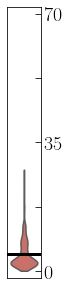

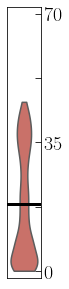

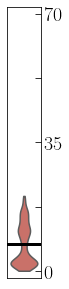

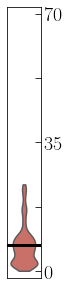

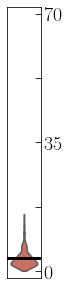

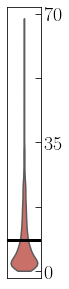

In [ ]:
name = ['A', 'B', 'C', 'D', 'E', 'F']
data = [A_df, B_df, C_df, D_df, E_df, F_df]

for (name, df) in zip(name, data):
  plt.figure(figsize = (0.6, 5))
  ax = sns.violinplot( x = 'Categories', y = 'Chords', data = df, inner = None, scale = 'area', color = '#D96459', cut = 0)
  ax.axhline(np.mean(df['Chords']), lw = 3, color = 'k')
  plt.xlabel('')
  plt.ylabel('')
  ax = plt.gca()
  ax.set_xticks([])
  ax.set_yticks([0, 17.5, 35, 52.5, 70])
  ax.set_yticklabels([0, '', 35, '', 70], fontsize = 20)
  ax.tick_params(direction = 'in', length = 6);
  ax.yaxis.tick_right()
  plt.ylim([-2,72])

  plt.savefig(str(name) + ".svg", format = 'svg', dpi=300)

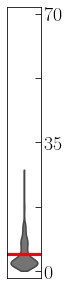

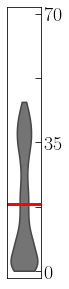

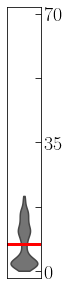

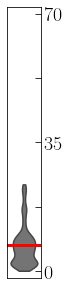

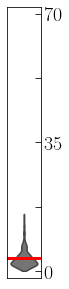

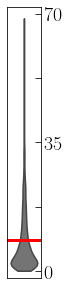

In [ ]:
# Plotting violinplot
# A

plt.figure(figsize = (0.6, 5))
ax = sns.violinplot( x = 'Categories', y = 'Chords', data = A_df, inner = None, scale = 'area', color = '#D96459', cut = 0)
ax.axhline(np.mean(A), lw = 3, color = 'k')
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([0, 17.5, 35, 52.5, 70])
ax.set_yticklabels([0, '', 35, '', 70], fontsize = 20)
ax.tick_params(direction = 'in', length = 6);
ax.yaxis.tick_right()
plt.ylim([-2,72])

plt.savefig("A.svg", format = 'svg', dpi=300)

# B
plt.figure(figsize = (0.6, 5))
ax = sns.violinplot( x = 'Categories', y = 'Chords', data = B_df, inner = None, scale = 'area', color = '#D96459', cut = 0)
ax.axhline(np.mean(B), lw = 3, color = 'k')
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([0, 17.5, 35, 52.5, 70])
ax.set_yticklabels([0, '', 35, '', 70], fontsize = 20)
ax.tick_params(direction = 'in', length = 6);
ax.yaxis.tick_right()
plt.ylim([-2,72])
plt.savefig("B.svg", format = 'svg', dpi=300)

# C
plt.figure(figsize = (0.6, 5))
ax = sns.violinplot( x = 'Categories', y = 'Chords', data = C_df, inner = None, scale = 'area', color = '#D964594', cut = 0)
ax.axhline(np.mean(C), lw = 3, color = 'k')
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([0, 17.5, 35, 52.5, 70])
ax.set_yticklabels([0, '', 35, '', 70], fontsize = 20)
ax.tick_params(direction = 'in', length = 6);
ax.yaxis.tick_right()
plt.ylim([-2,72])
plt.savefig("C.svg", format = 'svg', dpi=300)

# D
plt.figure(figsize = (0.6, 5))
ax = sns.violinplot( x = 'Categories', y = 'Chords', data = D_df, inner = None, scale = 'area', color = '#747474', cut = 0)
ax.axhline(np.mean(D), lw = 3, color = 'red')
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([0, 17.5, 35, 52.5, 70])
ax.set_yticklabels([0, '', 35, '', 70], fontsize = 20)
ax.tick_params(direction = 'in', length = 6);
ax.yaxis.tick_right()
plt.ylim([-2,72])
plt.savefig("D.svg", format = 'svg', dpi=300)

# E
plt.figure(figsize = (0.6, 5))
ax = sns.violinplot( x = 'Categories', y = 'Chords', data = E_df, inner = None, scale = 'count', color = '#747474', cut = 0)
ax.axhline(np.mean(E), lw = 3, color = 'red')
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([0, 17.5, 35, 52.5, 70])
ax.set_yticklabels([0, '', 35, '', 70], fontsize = 20)
ax.tick_params(direction = 'in', length = 6);
ax.yaxis.tick_right()
plt.ylim([-2,72])
plt.savefig("E.svg", format = 'svg', dpi=300)

# F
plt.figure(figsize = (0.6, 5))
ax = sns.violinplot( x = 'Categories', y = 'Chords', data = F_df, inner = None, scale = 'area', color = '#747474', cut = 0)
ax.axhline(np.mean(F), lw = 3, color = 'red')
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([0, 17.5, 35, 52.5, 70])
ax.set_yticklabels([0, '', 35, '', 70], fontsize = 20)
ax.tick_params(direction = 'in', length = 6);
ax.yaxis.tick_right()
plt.ylim([-2,72])
plt.savefig("F.svg", format = 'svg', dpi=300)

# Multi-stranded NS - Incubation time

In [ ]:
calibration = 0.415

hr1 = calibration*np.load('1hr.npy', allow_pickle = True)
hr3 = calibration*np.load('3hr.npy', allow_pickle = True)
hr6 = calibration*np.load('6hr.npy', allow_pickle = True)
hr9 = calibration*np.load('9hr.npy', allow_pickle = True)
hr12 = calibration*np.load('12hr.npy', allow_pickle = True)

In [ ]:
categories = []
for i in range(len(hr1)):
  categories.append('1h')
for  i in range(len(hr3)):
  categories.append('3h')
for  i in range(len(hr6)):
  categories.append('6h')
for  i in range(len(hr9)):
  categories.append('9h')
for  i in range(len(hr12)):
  categories.append('12h')

chords = np.concatenate((hr1, hr3, hr6, hr9, hr12), axis = 0)

df = pd.DataFrame({'Categories': np.array(categories),
             'Chords' : chords,
             })

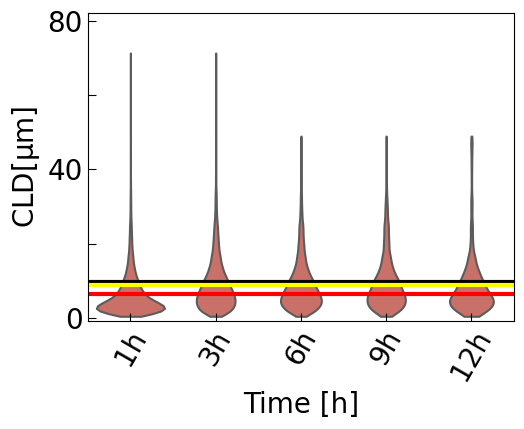

In [ ]:
plt.figure(figsize = (5.5, 4))
ax = sns.violinplot( x = 'Categories', y = 'Chords', data = df, inner = None, scale = 'area', color = '#D96459', cut = 0)
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.set_yticks([0, 20, 40, 60, 80])
ax.set_yticks([0, 20, 40, 60, 80])
ax.set_xticklabels(["1h", "3h", "6h", "9h", "12h"], fontsize = 20, rotation = 60)
ax.set_yticklabels([0, '', 40, '', 80], fontsize = 20)
plt.xlabel('Time [h]', fontsize = 20)
plt.ylabel('CLD[$\mu$m]', fontsize = 20)
ax.tick_params(direction = 'in', length = 6)
plt.ylim([-0.8,82.2])
# plt.tight_layout()
# ax.legend(["50 °C"])

ax.axhline(np.mean(hr1), lw = 3, color = 'red')
ax.axhline(np.mean(hr3), lw = 3, color = 'blue')
ax.axhline(np.mean(hr6), lw = 3, color = 'green')
ax.axhline(np.mean(hr9), lw = 3, color = 'k')
ax.axhline(np.mean(hr12), lw = 3, color = 'yellow')

plt.savefig("Jaimie_incubation_time_v2" + ".svg", format = 'svg', dpi=300)

plt.show()

In [ ]:
mean_1hr = np.mean(hr1)
mean_3hr = np.mean(hr3)
mean_6hr = np.mean(hr6)
mean_9hr = np.mean(hr9)
mean_12hr = np.mean(hr12)

print("Mean without normalization:", mean_1hr, mean_3hr, mean_6hr, mean_9hr, mean_12hr)

std_1hr = np.std(hr1)
std_3hr = np.std(hr3)
std_6hr = np.std(hr6)
std_9hr = np.std(hr9)
std_12hr = np.std(hr12)

print("Standard deriviation: ", std_1hr, std_3hr, std_6hr, std_9hr, std_12hr)

N_1hr = 4983
N_3hr = 858
N_6hr = 694
N_9hr = 583
N_12hr = 395

std_err_1hr = std_1hr/math.sqrt(N_1hr)
std_err_3hr = std_3hr/math.sqrt(N_3hr)
std_err_6hr = std_6hr/math.sqrt(N_6hr)
std_err_9hr = std_9hr/math.sqrt(N_9hr)
std_err_12hr = std_12hr/math.sqrt(N_12hr)

print("Standard error:", std_err_1hr, std_err_3hr, std_err_6hr, std_err_9hr, std_err_12hr)

Mean without normalization: 6.5041257695242924 9.313732383808096 9.261332496297728 9.730451567107131 8.725762380877987
Standard deriviation:  6.14072036308598 7.353892811191864 7.2085980005057015 7.77247533903463 8.090636974430394
Standard error: 0.0869909106663153 0.2510577610674293 0.2736346381163793 0.321903037977555 0.40708412545196093


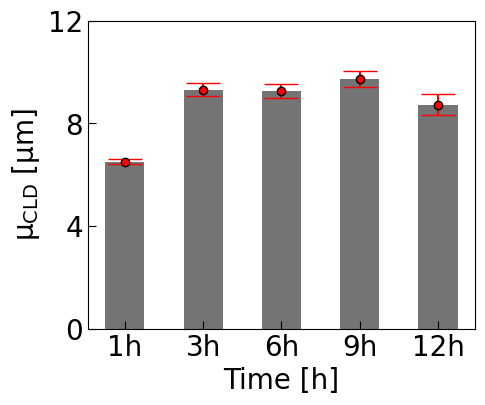

In [ ]:
plt.figure(figsize = (5, 4))
plt.bar([1, 2, 3, 4, 5], [mean_1hr, mean_3hr, mean_6hr, mean_9hr, mean_12hr], width = 0.5,color = '#747474')
plt.errorbar([1, 2, 3, 4, 5], [mean_1hr, mean_3hr, mean_6hr, mean_9hr, mean_12hr], yerr= [std_err_1hr, std_err_3hr, std_err_6hr, std_err_9hr, std_err_12hr], ls = '', marker = 'o', mec = 'k', mfc = 'red', color = 'red', capsize = 12)
plt.xticks([1, 2, 3, 4, 5], ['1h', '3h', '6h', '9h', '12h'], fontsize = 20)
plt.xlabel('Time [h]', fontsize = 20)
plt.yticks([0, 4, 8, 12], [0, 4, 8, 12], fontsize = 20)
plt.ylabel(r'$\mu_{CLD}$ [$\mu$m]', fontsize = 20)
ax = plt.gca()
ax.tick_params(direction = 'in', length = 6)

# plt.savefig("Jaimie_incubation_time_size.svg", format = 'svg', dpi=300)

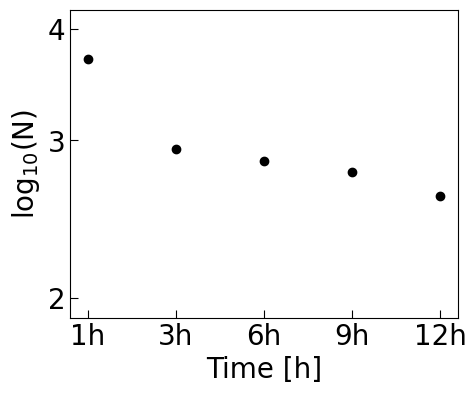

In [ ]:
plt.figure(figsize = (5,4))
plt.plot([1,2,3,4,5], np.log10(np.array([N_1hr, N_3hr, N_6hr, N_9hr, N_12hr])), 'o', color = 'k')
plt.yscale('log')
plt.xlabel('Time [h]', fontsize = 20)
plt.ylabel(r'log$_{10}$(N)', fontsize = 20)
plt.yticks([2, 3, 4], [2, 3, 4], fontsize = 20)
ax = plt.gca()
ax.tick_params(direction = 'in', length = 3, which = 'minor')
ax.tick_params(direction = 'in', length = 6, which = 'major')
plt.xticks([1,2,3,4,5], ['1h', '3h', '6h', '9h', '12h'], fontsize = 20)
plt.ylim([1.9, 4.2])
# plt.savefig("single cotrans number.svg", format = 'svg', dpi=300)

plt.show()

# Multi-stranded NS - Peptide recruitment 

In [ ]:
calibration = 0.415

P22 = []
strep = []
TAT = []
P22 = calibration*np.load('P22Con.npy', allow_pickle = True)
strep = calibration*np.load('StrepCon.npy', allow_pickle = True)
TAT = calibration*np.load('TATCon.npy', allow_pickle = True)

In [ ]:
categories = []
for i in range(len(P22)):
  categories.append('P22')
for  i in range(len(strep)):
  categories.append('Strep')
for  i in range(len(TAT)):
  categories.append('TAT')

chords = np.concatenate((P22, strep, TAT), axis = 0)

df = pd.DataFrame({'Categories': np.array(categories),
             'Chords' : chords,
             })

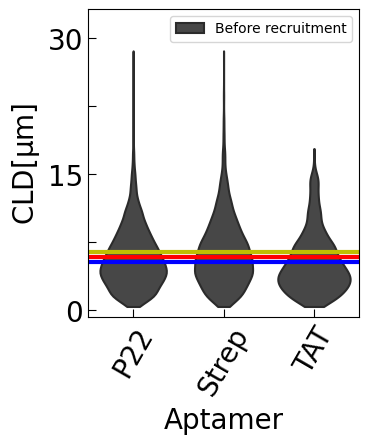

In [ ]:
plt.figure(figsize = (3.5, 4))
ax = sns.violinplot( x = 'Categories', y = 'Chords', data = df, inner = None, scale = 'area', color = '#474747', cut = 0)
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.set_yticks([0, 7.5, 15, 22.5, 30])
ax.axhline(np.mean(P22), lw = 3, color = 'r')
ax.axhline(np.mean(strep), lw = 3, color = 'y')
ax.axhline(np.mean(TAT), lw = 3, color = 'b')
ax.set_xticklabels(["P22", "Strep", "TAT"], fontsize = 20, rotation = 60)
ax.set_yticklabels([0, '', 15, '', 30], fontsize = 20)
plt.xlabel('Aptamer', fontsize = 20)
plt.ylabel('CLD[$\mu$m]', fontsize = 20)
ax.tick_params(direction = 'in', length = 6)
plt.ylim([-0.8,33.2])
# plt.tight_layout()
ax.legend(["Before recruitment"])
plt.savefig("Jaimie_UnloadedCond" + ".svg", format = 'svg', dpi=300)

plt.show()

In [ ]:
os.chdir('')

In [ ]:
calibration = 0.415

P22_load = []
strep_load = []
TAT_load = []
P22_load = calibration*np.load('C2_GAGCUC_P22.npy', allow_pickle = True)
strep_load = calibration*np.load('C3_GCGC_Strep.npy', allow_pickle = True)
TAT_load = calibration*np.load('C1_GCUAGC_TAT.npy', allow_pickle = True)

In [ ]:
categories = []
for i in range(len(P22_load)):
  categories.append('P22')
for  i in range(len(strep_load)):
  categories.append('Strep')
for  i in range(len(TAT_load)):
  categories.append('TAT')

chords = np.concatenate((P22_load, strep_load, TAT_load), axis = 0)

df = pd.DataFrame({'Categories': np.array(categories),
             'Chords' : chords,
             })

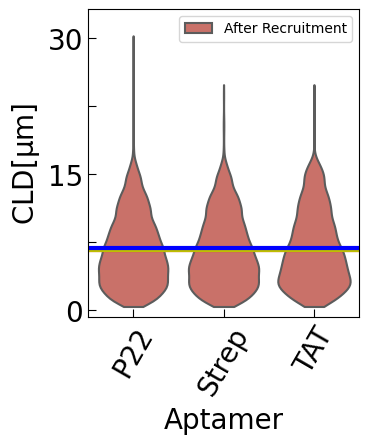

In [ ]:
plt.figure(figsize = (3.5, 4))
ax = sns.violinplot( x = 'Categories', y = 'Chords', data = df, inner = None, scale = 'area', color = '#D96459', cut = 0)
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.axhline(np.mean(P22_load), lw = 3, color = 'r')
ax.axhline(np.mean(strep_load), lw = 3, color = 'y')
ax.axhline(np.mean(TAT_load), lw = 3, color = 'b')
ax.set_yticks([0, 7.5, 15, 22.5, 30])
ax.set_xticklabels(["P22", "Strep", "TAT"], fontsize = 20, rotation = 60)
ax.set_yticklabels([0, '', 15, '', 30], fontsize = 20)
plt.xlabel('Aptamer', fontsize = 20)
plt.ylabel('CLD[$\mu$m]', fontsize = 20)
ax.tick_params(direction = 'in', length = 6)
plt.ylim([-0.8,33.2])
# plt.tight_layout()
ax.legend(["After Recruitment"])
plt.savefig("Jaimie_LoadedCond" + ".svg", format = 'svg', dpi=300)

plt.show()

## Plotting separatly

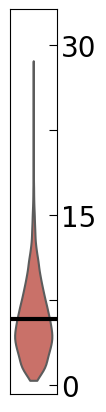

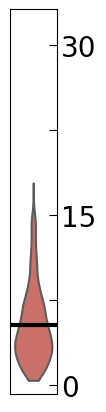

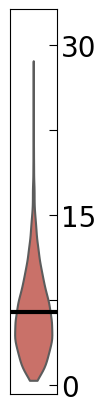

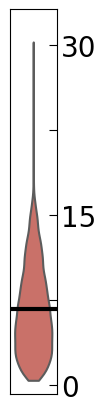

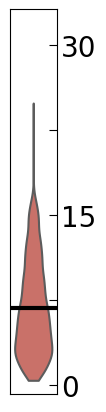

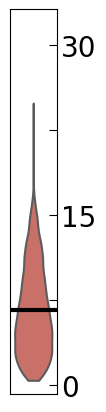

In [ ]:
P22_unload_categories = []
TAT_unload_categories = []
Strep_unload_categories = []
P22_load_categories = []
TAT_load_categories = []
Strep_load_categories = []

for i in range(len(P22)):
  P22_unload_categories.append('P22_unload')
P22_unload_df = pd.DataFrame({'Categories': np.array(P22_unload_categories),
             'Chords' : P22
             })
for i in range(len(TAT)):
  TAT_unload_categories.append('TAT_unload')
TAT_unload_df = pd.DataFrame({'Categories': np.array(TAT_unload_categories),
             'Chords' : TAT
             })
for i in range(len(strep)):
  Strep_unload_categories.append('Strep_unload')
Strep_unload_df = pd.DataFrame({'Categories': np.array(Strep_unload_categories),
             'Chords' : strep
             })
for i in range(len(P22_load)):
  P22_load_categories.append('P22_load')
P22_load_df = pd.DataFrame({'Categories': np.array(P22_load_categories),
             'Chords' : P22_load
             })
for i in range(len(TAT_load)):
  TAT_load_categories.append('TAT_load')
TAT_load_df = pd.DataFrame({'Categories': np.array(TAT_load_categories),
             'Chords' : TAT_load
             })
for i in range(len(strep_load)):
  Strep_load_categories.append('Strep_load')
Strep_load_df = pd.DataFrame({'Categories': np.array(Strep_load_categories),
             'Chords' : strep_load
             })

name = ['P22_unload', 'TAT_unload', 'Strep_unload', 'P22_load', 'TAT_load', 'Strep_load']
data = [P22_unload_df, TAT_unload_df, Strep_unload_df, P22_load_df, TAT_load_df, Strep_load_df]

for (name, df) in zip(name, data):
  plt.figure(figsize = (0.6, 5))
  ax = sns.violinplot( x = 'Categories', y = 'Chords', data = df, inner = None, scale = 'area', color = '#D96459', cut = 0)
  ax.axhline(np.mean(df['Chords']), lw = 3, color = 'k')
  plt.xlabel('')
  plt.ylabel('')
  ax = plt.gca()
  ax.set_xticks([])
  ax.set_yticks([0, 7.5, 15, 22.5, 30])
  ax.set_yticklabels([0, '', 15, '', 30], fontsize = 20)
  ax.tick_params(direction = 'in', length = 6);
  ax.yaxis.tick_right()
  plt.ylim([-0.8,33.2])
  plt.savefig(str(name) + ".svg", format = 'svg', dpi=300)

# Single-stranded NS - coTX time course



In [ ]:
calibration = 0.07

hr2_t1 = calibration*np.load('2hr_t1.npy', allow_pickle = True)
hr2_t2 = calibration*np.load('2hr_t2.npy', allow_pickle = True)
hr2_t3 = calibration*np.load('2hr_t3.npy', allow_pickle = True)
hr3_t1 = calibration*np.load('3hr_t1.npy', allow_pickle = True)
hr3_t2 = calibration*np.load('3hr_t2.npy', allow_pickle = True)
hr3_t3 = calibration*np.load('3hr_t3.npy', allow_pickle = True)
hr4_t1 = calibration*np.load('4hr_t1.npy', allow_pickle = True)
hr4_t2 = calibration*np.load('4hr_t2.npy', allow_pickle = True)
hr4_t3 = calibration*np.load('4hr_t3.npy', allow_pickle = True)
hr5_t1 = calibration*np.load('5hr_t1.npy', allow_pickle = True)
hr5_t2 = calibration*np.load('5hr_t2.npy', allow_pickle = True)
hr5_t3 = calibration*np.load('5hr_t3.npy', allow_pickle = True)

In [ ]:
hr1 = [-1]
hr2 = np.concatenate((hr2_t1, hr2_t2, hr2_t3), axis = 0)
hr3 = np.concatenate((hr3_t1, hr3_t2, hr3_t3), axis = 0)
hr4 = np.concatenate((hr4_t1, hr4_t2, hr4_t3), axis = 0)
hr5 = np.concatenate((hr5_t1, hr5_t2, hr5_t3), axis = 0)

In [ ]:
## plot pooled violin plots
pool_categories = []
for i in range(len(hr1)):
  pool_categories.append('1hr')
for i in range(len(hr2)):
  pool_categories.append('2hr')
for i in range(len(hr3)):
  pool_categories.append('3hr')
for i in range(len(hr4)):
  pool_categories.append('4hr')
for i in range(len(hr5)):
  pool_categories.append('5hr')

chords = np.concatenate((hr1, hr2, hr3, hr4, hr5), axis = 0)

# building pandas dataframe for violinplot
df = pd.DataFrame({'Categories': np.array(pool_categories),
             'Chords' : chords # using log10 of chords
             })

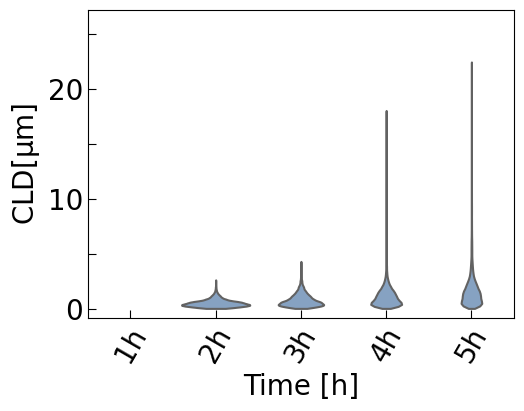

In [ ]:
plt.figure(figsize = (5.5, 4))
ax = sns.violinplot( x = 'Categories', y = 'Chords', data = df, inner = None, scale = 'area', color = '#7CA1CC', cut = 0)
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.set_yticks([0, 5, 10, 15, 20, 25, 30])
ax.set_xticklabels(["1h", "2h", "3h", "4h", "5h"], fontsize = 20, rotation = 60)
ax.set_yticklabels([0, '', 10, '', 20, '',30], fontsize = 20)
plt.xlabel('Time [h]', fontsize = 20)
plt.ylabel('CLD[$\mu$m]', fontsize = 20)
ax.tick_params(direction = 'in', length = 6)
plt.ylim([-0.8,27.2])
# plt.tight_layout()
# ax.legend(["50 °C"])
#plt.savefig("Jaimie_incubation_time" + ".svg", format = 'svg', dpi=300)

plt.show()

In [ ]:
categories_3hr = []
for i in range(len(hr3)):
  categories_3hr.append('J3_TX_3h')

df_TX3hr = pd.DataFrame({'Categories': np.array(categories_3hr),
             'Chords' : hr3,
             })

In [ ]:
plt.figure(figsize = (0.6, 5))
ax = sns.violinplot( x = 'Categories', y = 'Chords', data = df_TX3hr, inner = None, scale = 'area', color = '#D96459', cut = 0)
ax.axhline(np.mean(df['Chords']), lw = 3, color = 'k')
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([0, 2.5, 5, 7.5, 10])
ax.set_yticklabels([0, '', 5, '', 10], fontsize = 20)
ax.tick_params(direction = 'in', length = 6);
ax.yaxis.tick_right()
plt.ylim([-0.8,12.2])
# plt.savefig("J3_lysate_3h" + ".svg", format = 'svg', dpi=300)

# Single-stranded NS - coTX 3hr

In [ ]:
calibration = 0.07
hr0_t1 = calibration*np.load('0hr_t1.npy', allow_pickle = True)
hr0_t2 = calibration*np.load('0hr_t2.npy', allow_pickle = True)
hr0_t3 = calibration*np.load('0hr_t3.npy', allow_pickle = True)
hr1_t1 = calibration*np.load('1hr_t1.npy', allow_pickle = True)
hr1_t2 = calibration*np.load('1hr_t2.npy', allow_pickle = True)
hr1_t3 = calibration*np.load('1hr_t3.npy', allow_pickle = True)
hr2_t1 = calibration*np.load('2hr_t1.npy', allow_pickle = True)
hr2_t2 = calibration*np.load('2hr_t2.npy', allow_pickle = True)
hr2_t3 = calibration*np.load('2hr_t3.npy', allow_pickle = True)
hr3_t1 = calibration*np.load('3hr_t1.npy', allow_pickle = True)
hr3_t2 = calibration*np.load('3hr_t2.npy', allow_pickle = True)
hr3_t3 = calibration*np.load('3hr_t3.npy', allow_pickle = True)




In [ ]:
hr0 = np.concatenate((hr0_t1, hr0_t2, hr0_t3), axis = 0)
hr1 = np.concatenate((hr1_t1, hr1_t2, hr1_t3), axis = 0)
hr2 = np.concatenate((hr2_t1, hr2_t2, hr2_t3), axis = 0)
hr3 = np.concatenate((hr3_t1, hr3_t2, hr3_t3), axis = 0)



In [ ]:
## plot pooled violin plots
pool_categories = []
for i in range(len(hr0)):
  pool_categories.append('0hr')
for i in range(len(hr1)):
  pool_categories.append('1hr')
for i in range(len(hr2)):
  pool_categories.append('2hr')
for i in range(len(hr3)):
  pool_categories.append('3hr')




chords = np.concatenate((hr0, hr1, hr2, hr3), axis = 0)

# building pandas dataframe for violinplot
df = pd.DataFrame({'Categories': np.array(pool_categories),
             'Chords' : chords # using log10 of chords
             })

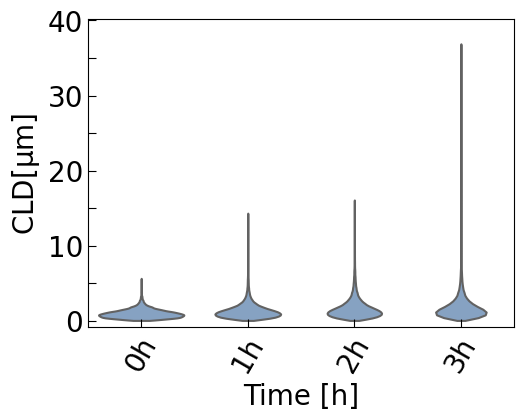

In [ ]:
plt.figure(figsize = (5.5, 4))
ax = sns.violinplot( x = 'Categories', y = 'Chords', data = df, inner = None, scale = 'area', color = '#7CA1CC', cut = 0)
plt.xlabel('')
plt.ylabel('')
ax = plt.gca()
ax.set_yticks([0, 5, 10, 15, 20, 25, 30, 35, 40])
ax.set_xticklabels(["0h", "1h", "2h", "3h"], fontsize = 20, rotation = 60)
ax.set_yticklabels([0, '', 10, '', 20, '', 30, '', 40 ], fontsize = 20)
plt.xlabel('Time [h]', fontsize = 20)
plt.ylabel('CLD[$\mu$m]', fontsize = 20)
ax.tick_params(direction = 'in', length = 6)
plt.ylim([-0.8, 40.2])
# plt.tight_layout()
# ax.legend(["50 °C"])
#plt.savefig("Jaimie_incubation_time" + ".svg", format = 'svg', dpi=300)

plt.show()